# r/Fakeddit

## Setup and import libraries

In [1]:
# Automatically reloading imported modules
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.helpers import *

pd.set_option('display.max_columns', None)

In [3]:
# Change design of plots
sns.set(style="whitegrid")

# Change sizes and resolution of plots
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [4]:
df_train = pd.read_csv('data/train.tsv', delimiter='\t', usecols=range(4, 20))
df_test = pd.read_csv('data/test_public.tsv', delimiter='\t', usecols=range(4, 20))
df_validation = pd.read_csv('data/validate.tsv', delimiter='\t', usecols=range(4, 20))

df = pd.concat([df_train, df_test, df_validation], ignore_index=True)

## General descriptive analysis

Let's check shape of the data - number of rows and attributes:

In [5]:
df.shape

(1063106, 16)

Overview of the data:

In [6]:
df.head()

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,Alexithymia,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,i.imgur.com,True,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,NaN,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1,0,0
1,RickSisco,NaN,1.443822e+09,NaN,True,cvm5uy4,http://i.imgur.com/yxrkYT8.jpg,3n7fld,NaN,5,psbattle_artwork,NaN,NaN,0,2,4
2,VIDCAs17,this concerned sink with a tiny hat,1.534727e+09,i.redd.it,True,98pbid,https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...,NaN,2.0,119,pareidolia,This concerned sink with a tiny hat,0.99,0,2,2
3,prometheus1123,hackers leak emails from uae ambassador to us,1.496511e+09,aljazeera.com,True,6f2cy5,https://external-preview.redd.it/6fNhdbc6K1vFA...,NaN,1.0,44,neutralnews,Hackers leak emails from UAE ambassador to US,0.92,1,0,0
4,NaN,NaN,1.378792e+09,NaN,True,cc5cbon,http://i.imgur.com/M8KTWMx.jpg,1lz1q0,NaN,3,psbattle_artwork,NaN,NaN,0,2,4


### Datatypes

**Note:** Be careful, attributes with only NaN values are considered as `float64` type by default.

In [7]:
df.dtypes

author                   object
clean_title              object
created_utc             float64
domain                   object
hasImage                   bool
id                       object
image_url                object
linked_submission_id     object
num_comments            float64
score                     int64
subreddit                object
title                    object
upvote_ratio            float64
2_way_label               int64
3_way_label               int64
6_way_label               int64
dtype: object

### Basic characteristics

In [8]:
df.describe()

,created_utc,num_comments,score,upvote_ratio,2_way_label,3_way_label,6_way_label
count,1.063106e+06,770108.000000,1.063106e+06,770108.000000,1.063106e+06,1.063106e+06,1.063106e+06
mean,1.483382e+09,17.988407,3.157692e+02,0.853539,4.561323e-01,1.069203e+00,1.708460e+00
std,6.708125e+07,126.164818,2.657364e+03,0.116798,4.980721e-01,9.882709e-01,1.785789e+00
min,1.211518e+09,0.000000,-9.500000e+02,0.500000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.428645e+09,1.000000,3.000000e+00,0.770000,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.494011e+09,2.000000,1.000000e+01,0.870000,0.000000e+00,2.000000e+00,1.000000e+00
75%,1.550843e+09,7.000000,3.400000e+01,0.950000,1.000000e+00,2.000000e+00,4.000000e+00
max,1.573859e+09,17355.000000,1.371790e+05,1.000000,1.000000e+00,2.000000e+00,5.000000e+00


In [9]:
df.describe(exclude=[np.number])

,author,clean_title,domain,hasImage,id,image_url,linked_submission_id,subreddit,title
count,882991,971806,770108,1063106,1063106,771698,292998,1063106,973753
unique,338171,863876,23070,2,1063106,750467,93623,22,899604
top,ApiContraption,other discussions,i.redd.it,True,cufffi7,https://external-preview.redd.it/ESPM-tTuK3wer...,7m831k,psbattle_artwork,Other Discussions
freq,74249,9264,305836,773564,1,2981,382,292998,8740


### One-value columns

Which attributes contain only one value?

In [10]:
one_value_attributes_analysis(df)

### Missing values

Analysis of missing values in attributes:

author: 180115 (16.94%)
clean_title: 91300 (8.59%)
domain: 292998 (27.56%)
image_url: 291408 (27.41%)
linked_submission_id: 770108 (72.44%)
num_comments: 292998 (27.56%)
title: 89353 (8.4%)
upvote_ratio: 292998 (27.56%)

Missing values plot (inverse logic, plot is showing how many values are not NaN):


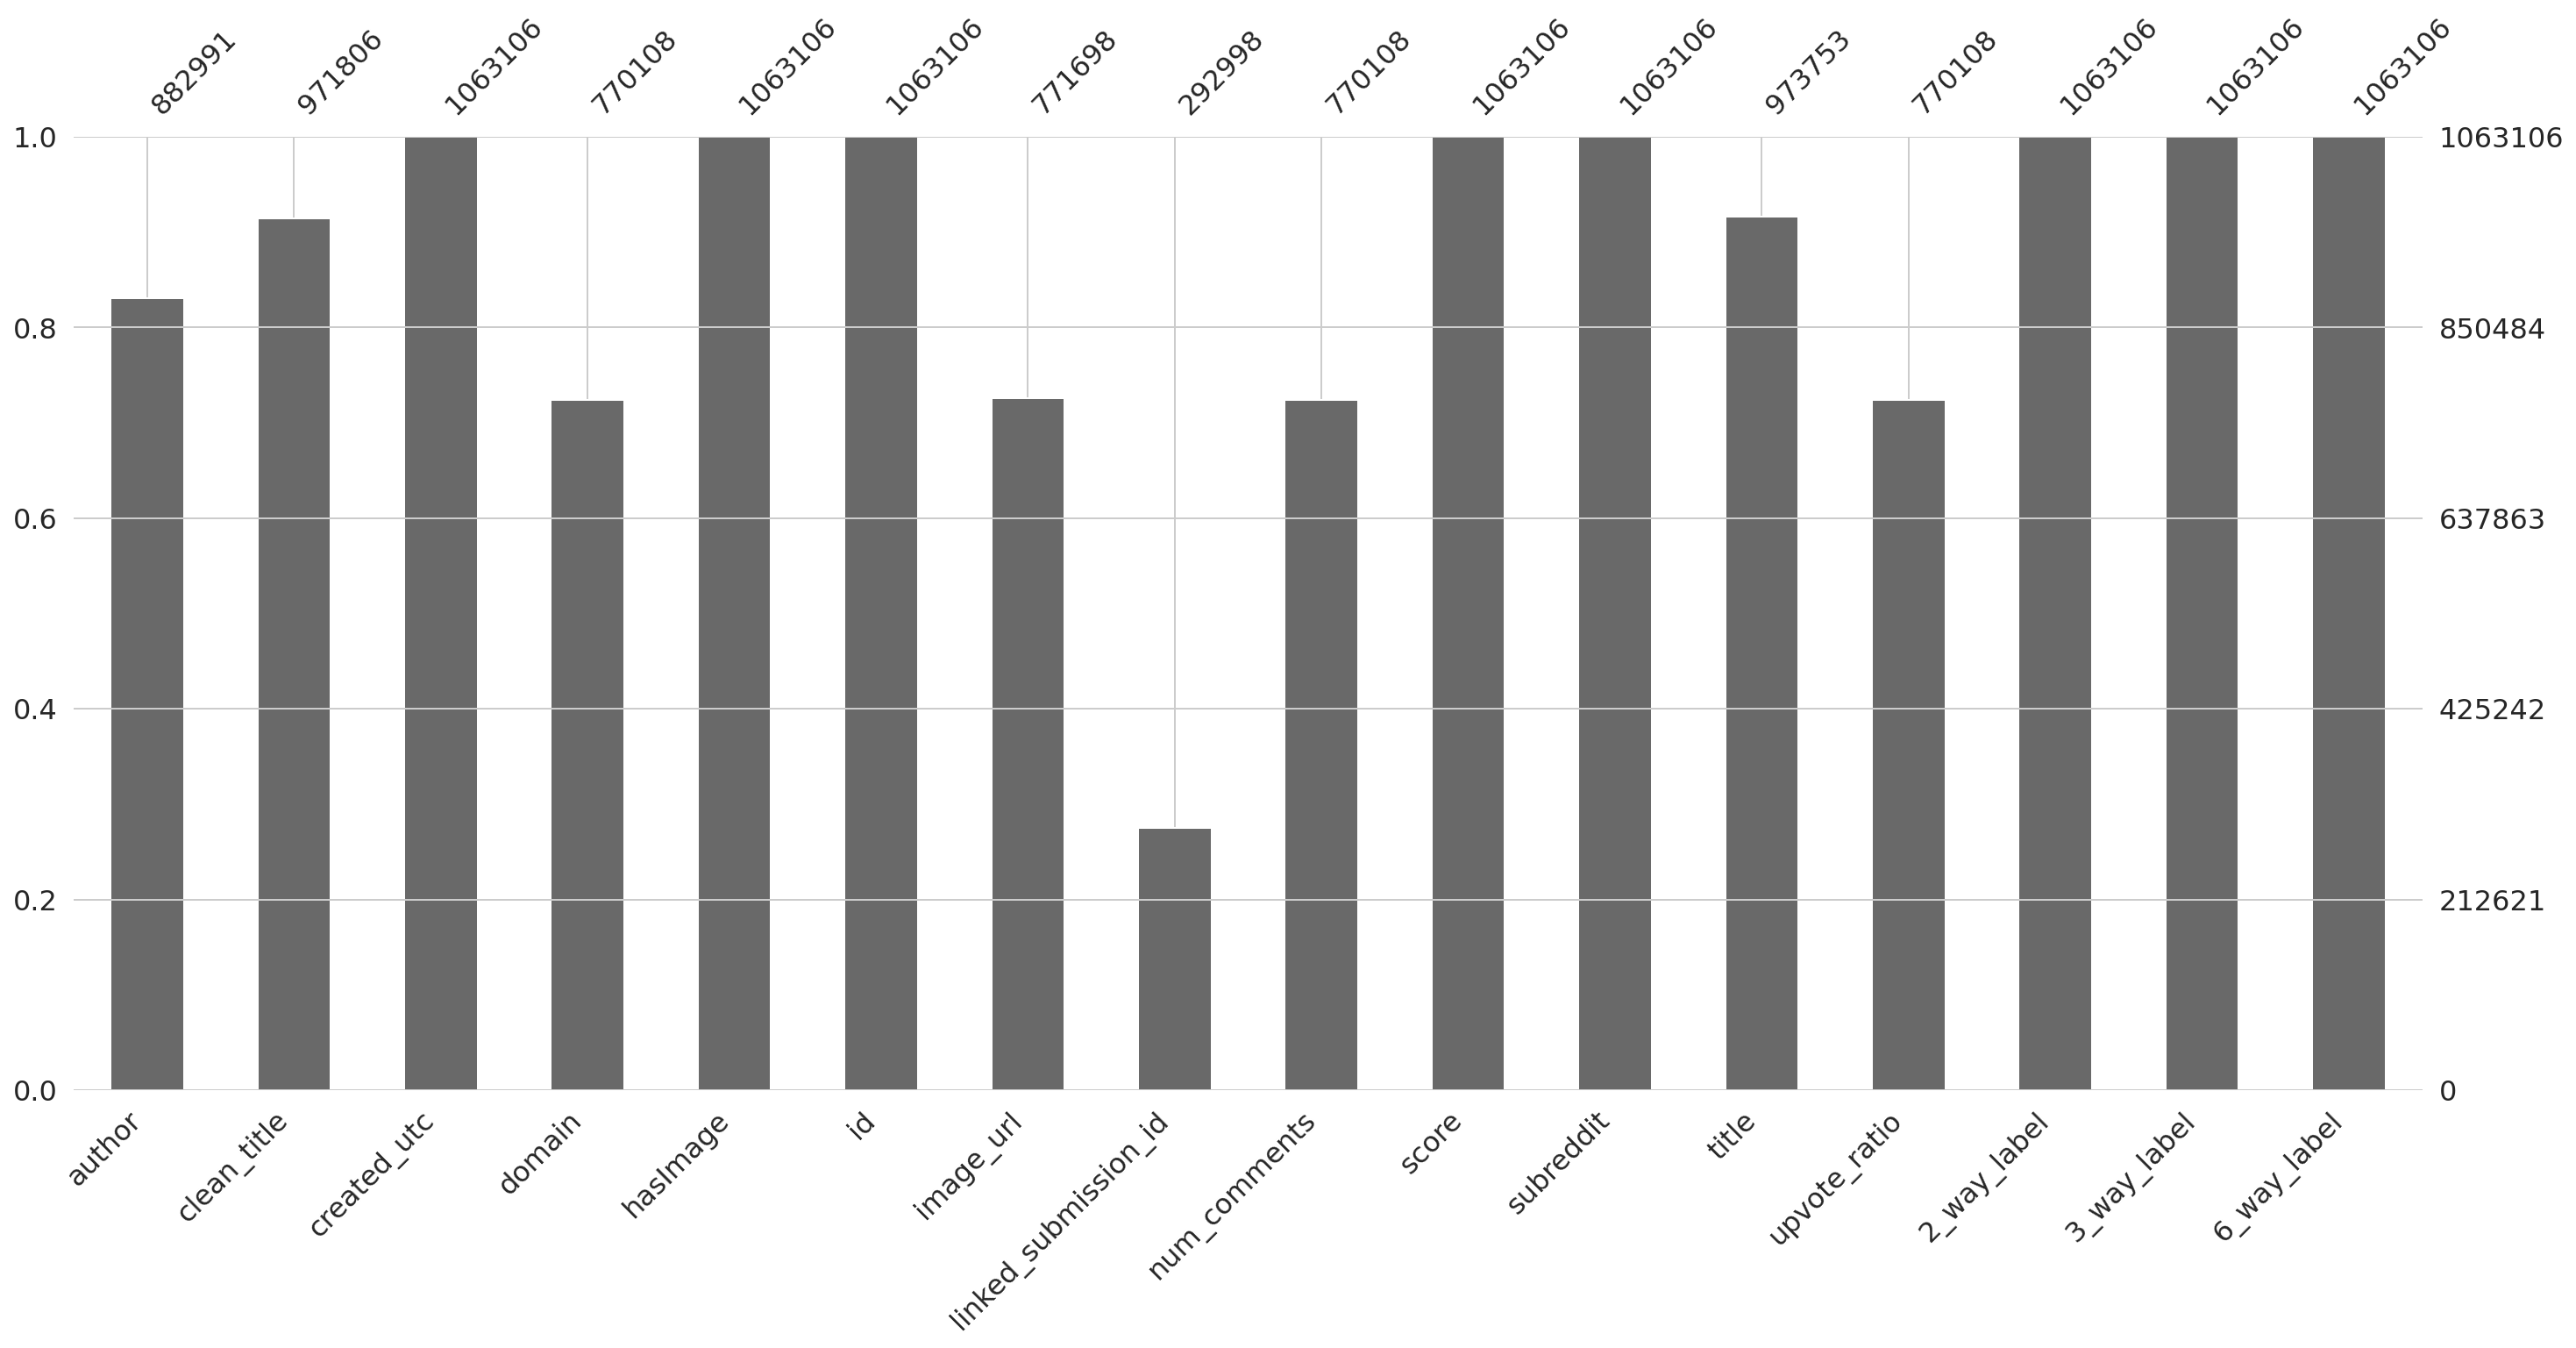

In [11]:
missing_values_analysis(df)

### Duplicates

Are there any duplicates?

In [12]:
df.duplicated().any()

False

## Attributes analysis

Analysis of all attributes:

In [13]:
skip_attributes = [
    'id', 'linked_submission_id', 'image_url', 'created_utc', '3_way_label', '6_way_label'
] # attributes to skip in analysis (e.g. id)

textual_attributes = [
    'clean_title', 'title'
] # attributes with text values (e.g. content of article)
textual_attributes = list(filter(lambda value: value not in skip_attributes, textual_attributes))

numerical_attributes = list(df.select_dtypes([np.number]).columns)
numerical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, numerical_attributes))

categorical_attributes = list(df.select_dtypes(['object', 'category', 'bool']).columns)
categorical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, categorical_attributes))

label_column = '2_way_label' # attribute considered as "label"

### Label attribute distribution

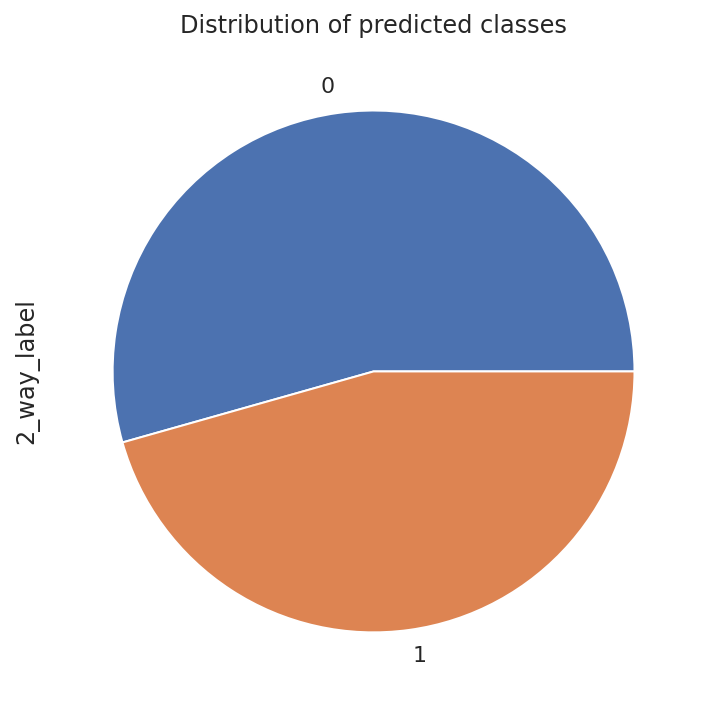

In [14]:
df[label_column].value_counts().plot(kind='pie', title='Distribution of predicted classes');

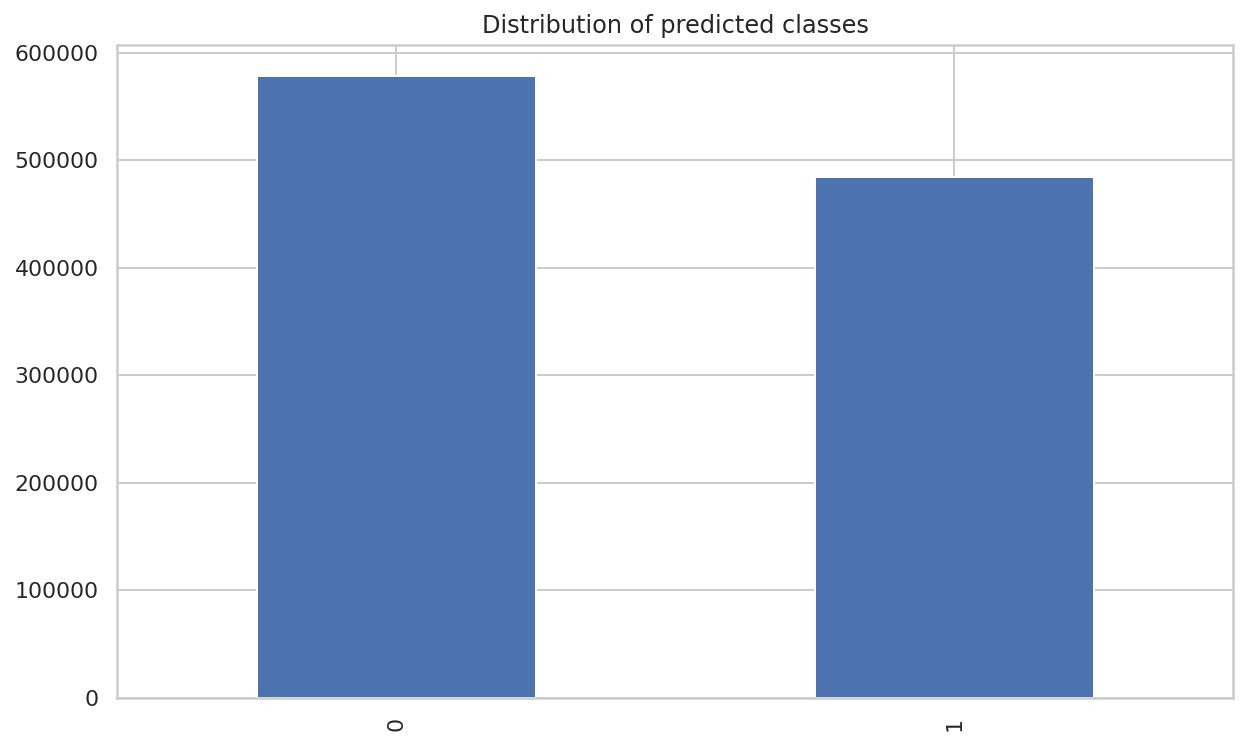

In [15]:
df[label_column].value_counts().plot(kind='bar', title='Distribution of predicted classes');

### Numerical attributes

Analysis of numerical attributes:



Analysis of attribute "num_comments"


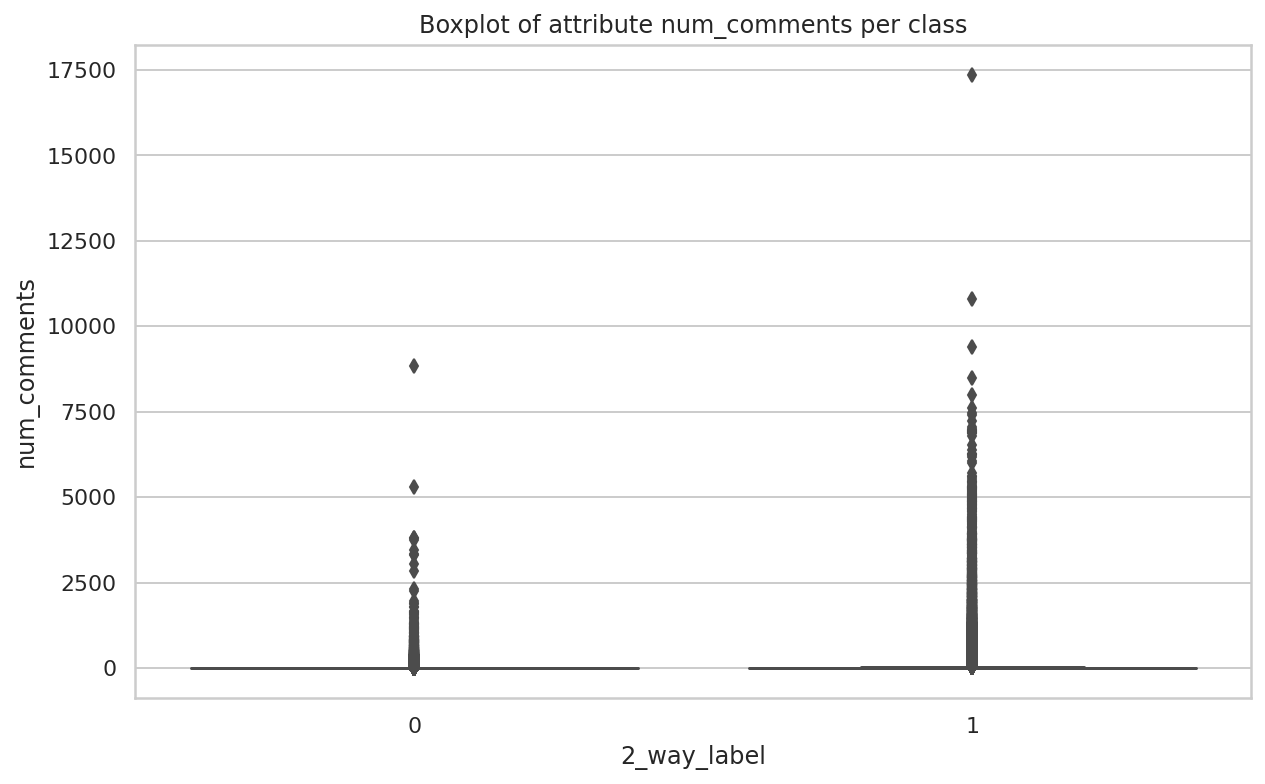

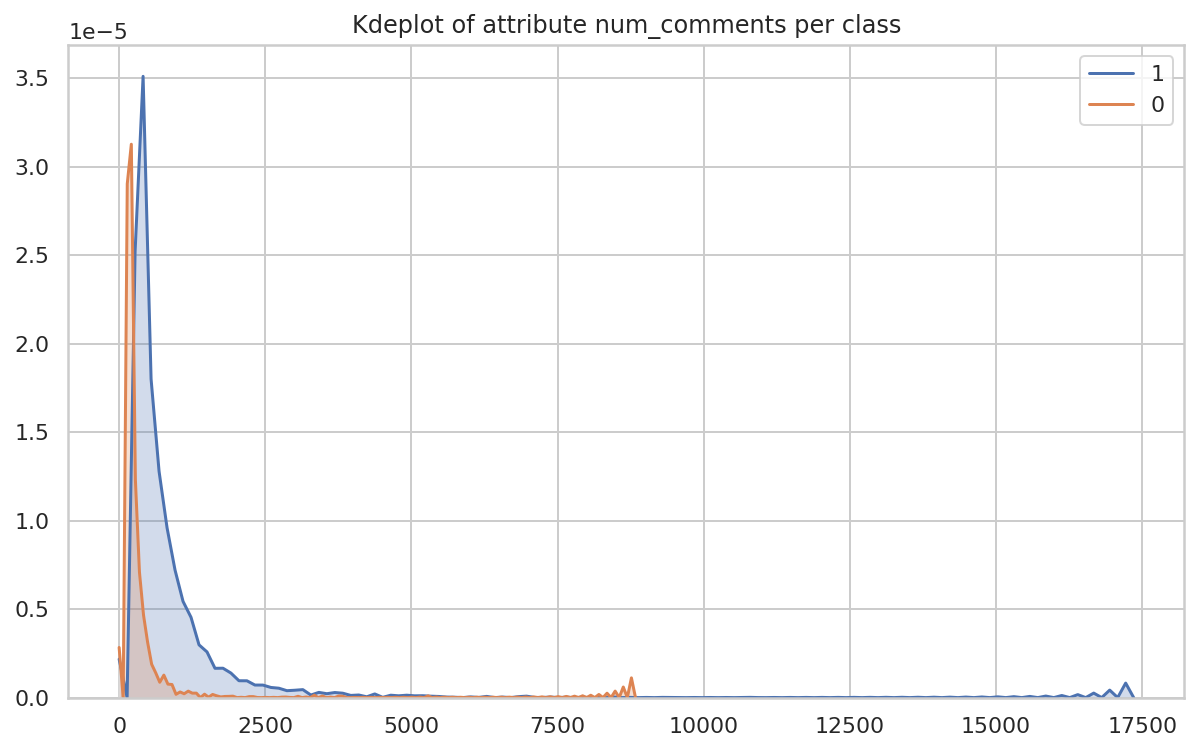



Analysis of attribute "score"


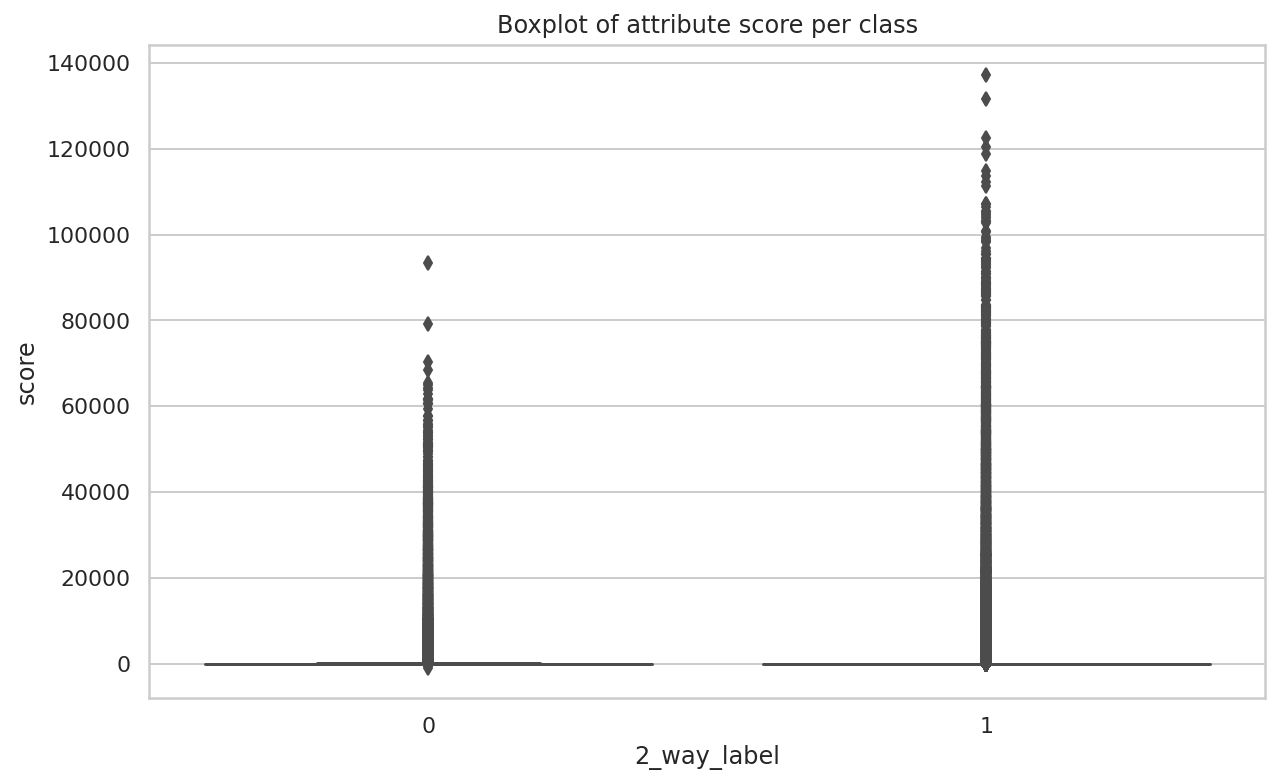

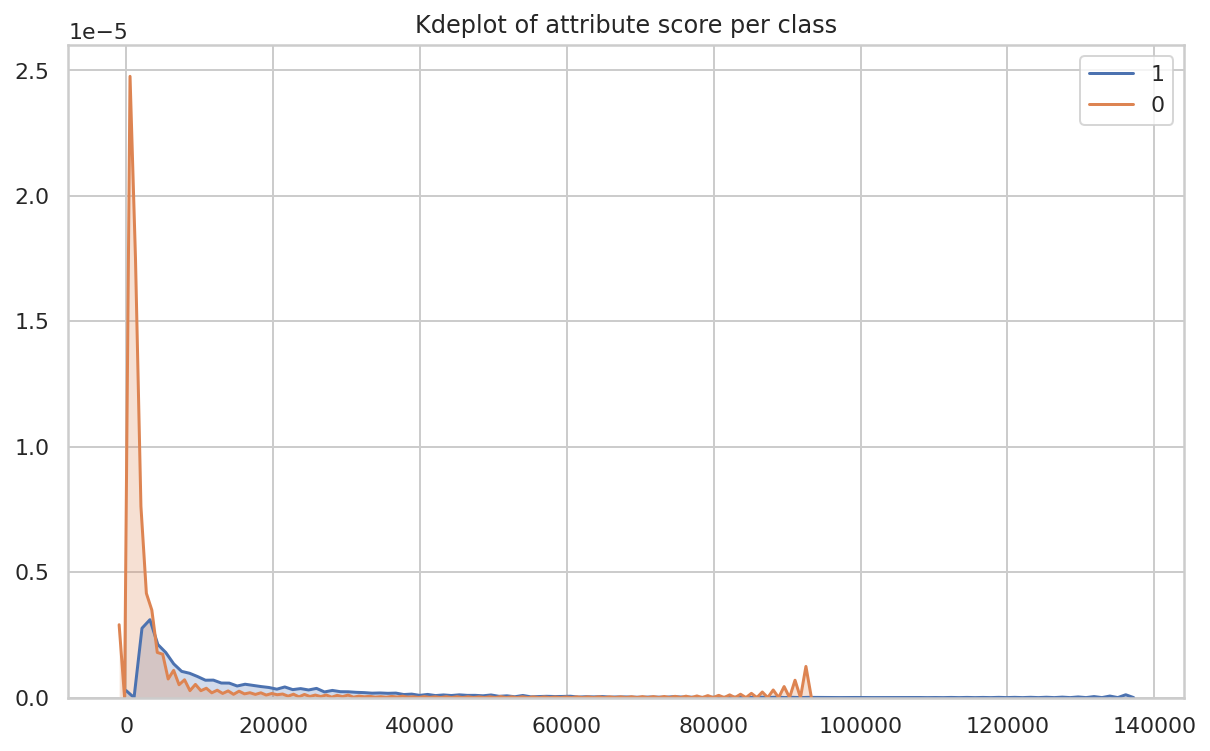



Analysis of attribute "upvote_ratio"


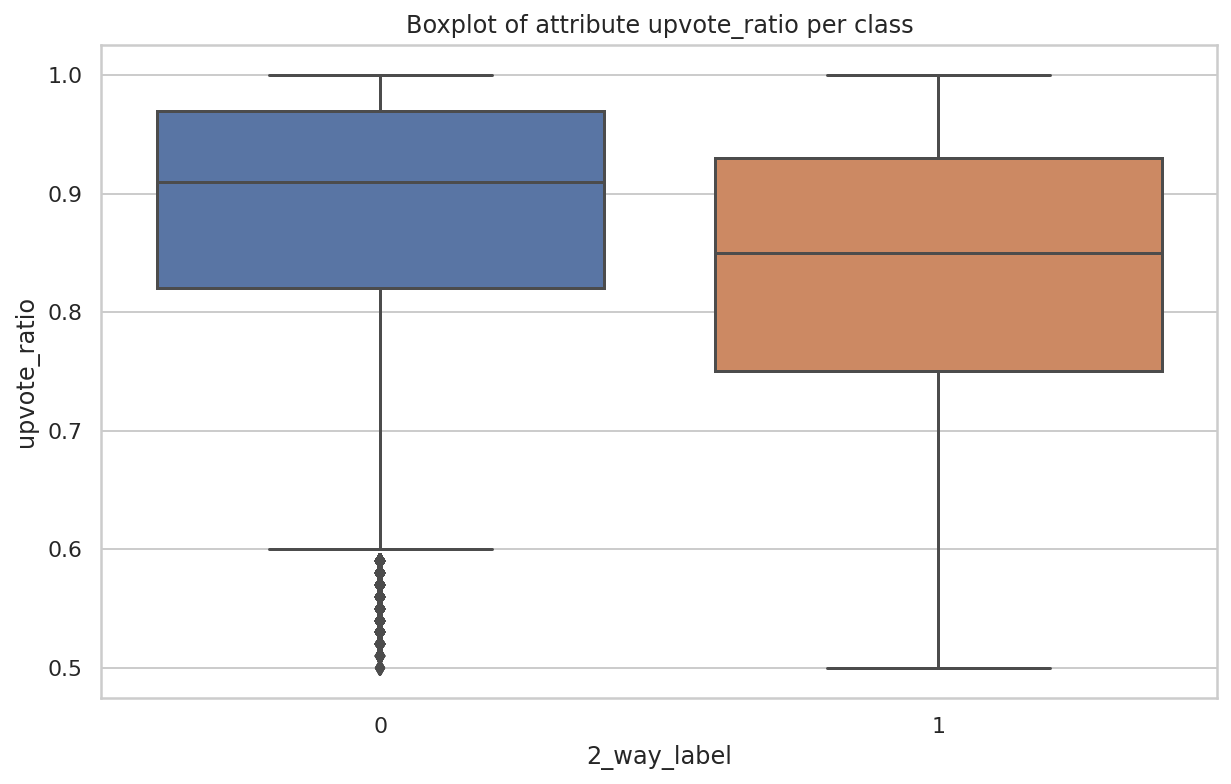

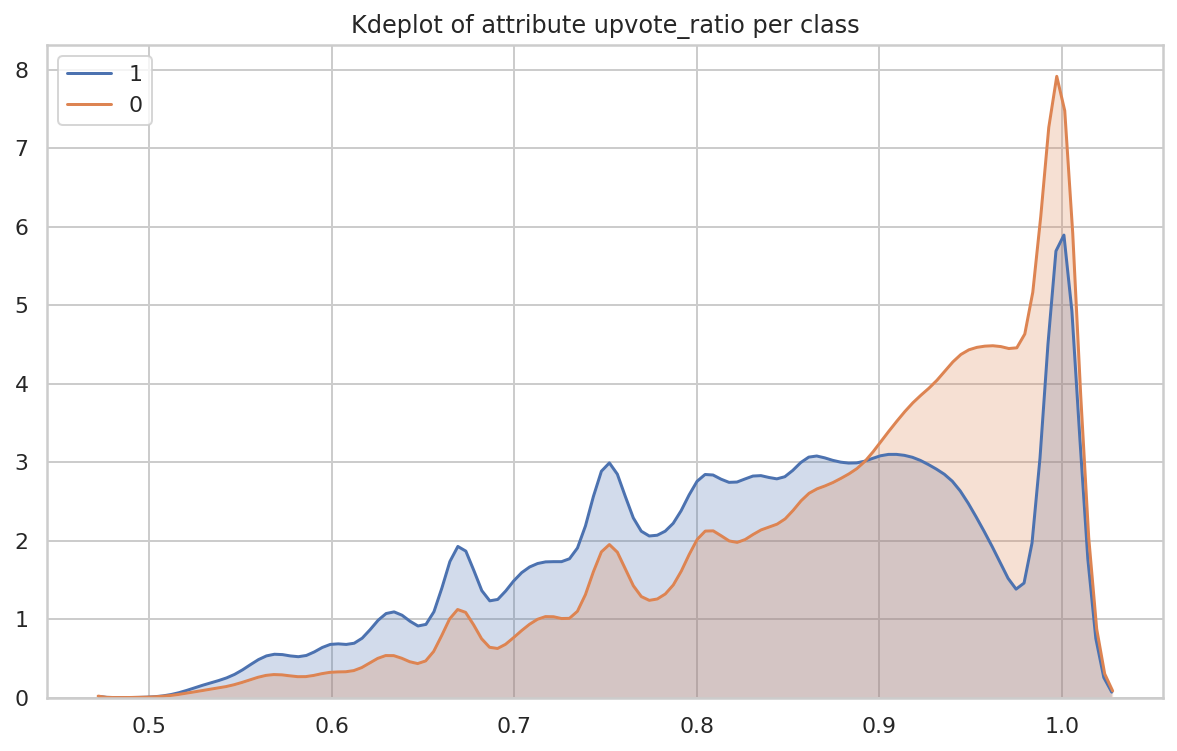

In [16]:
analyse_numerical_attributes(df, label_column, numerical_attributes)

### Categorical attributes

Analysis of categorical attributes:



Analysis of attribute "author"


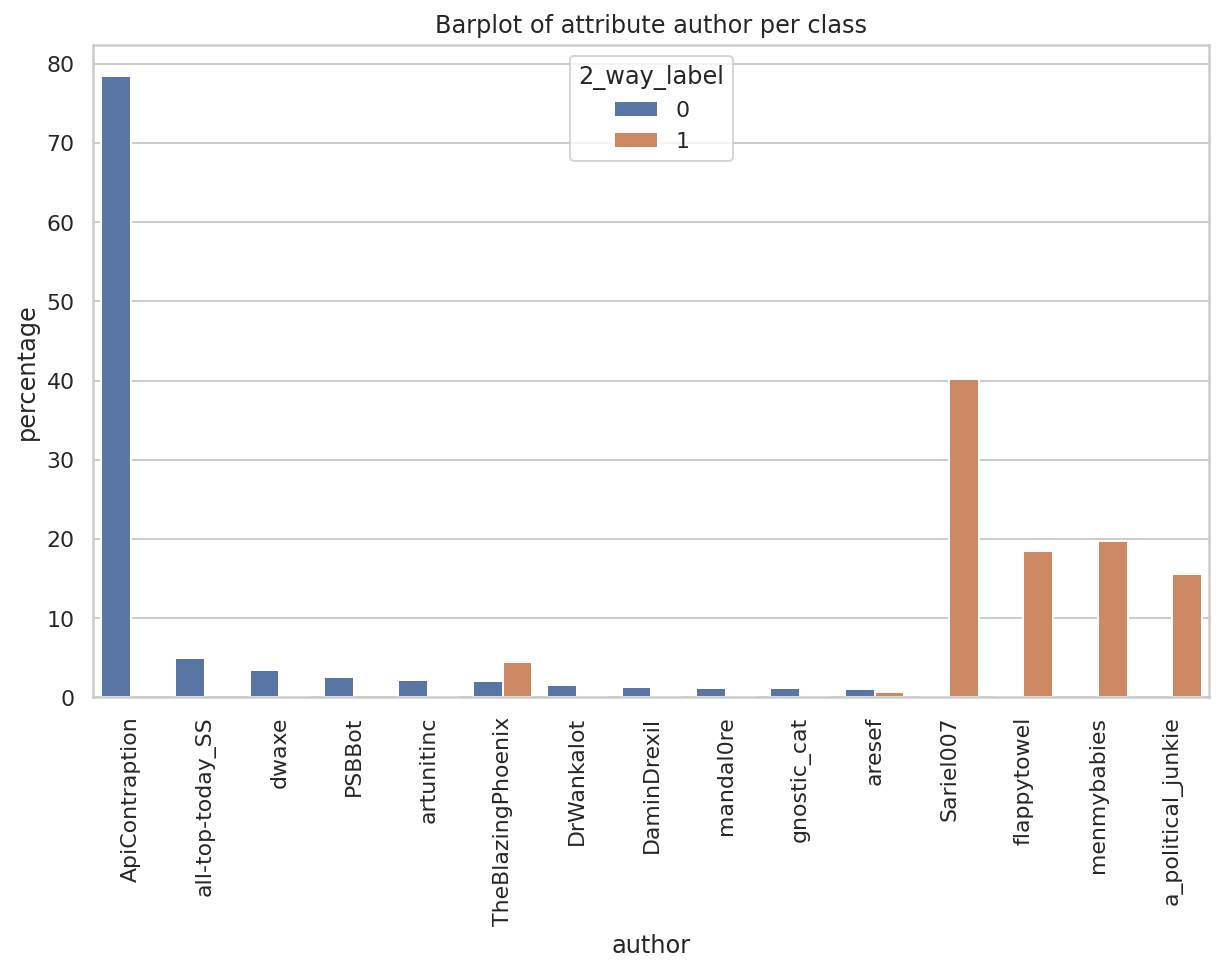



Analysis of attribute "domain"


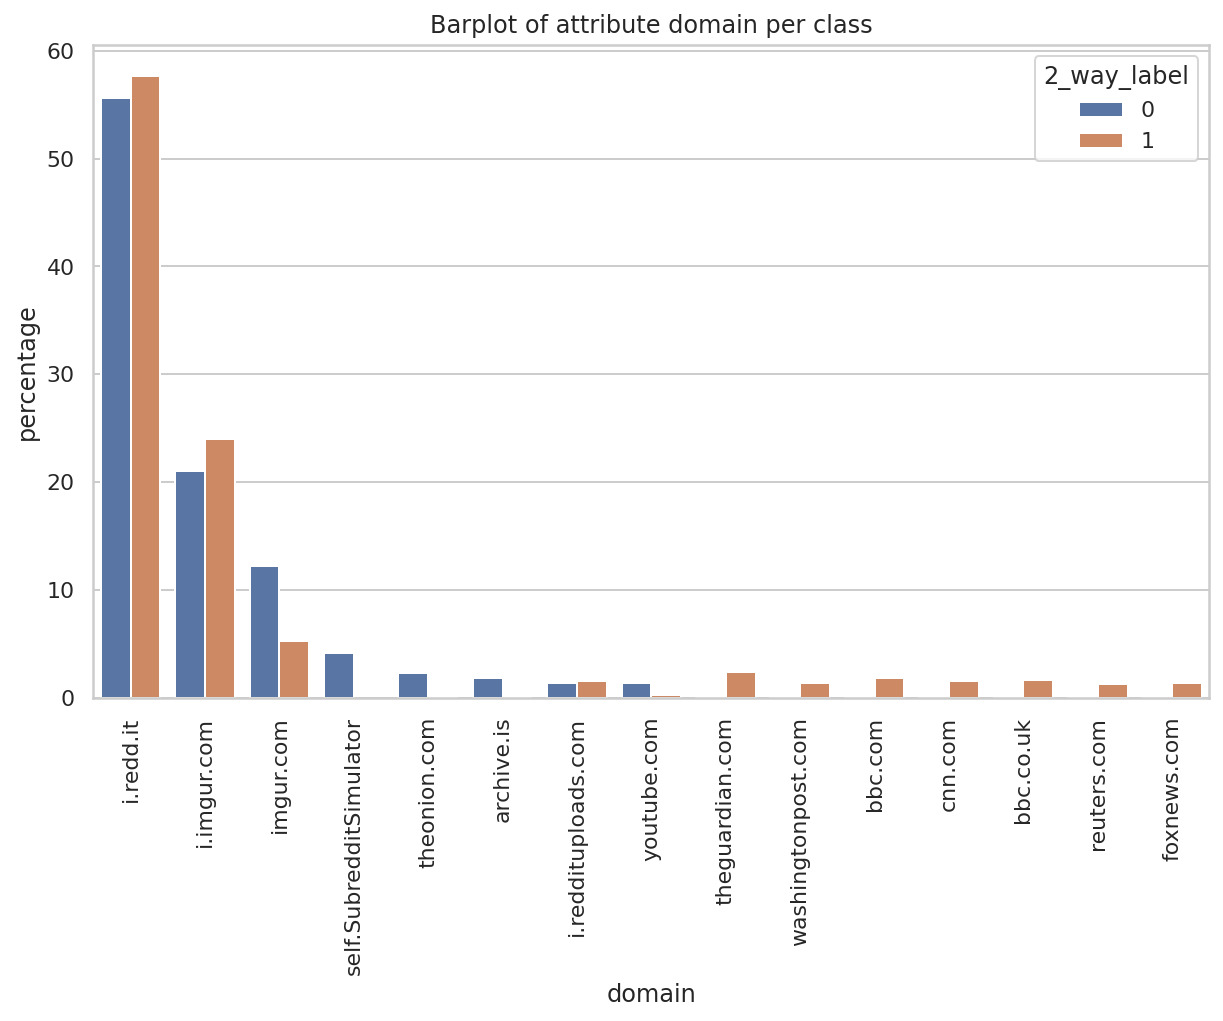



Analysis of attribute "hasImage"


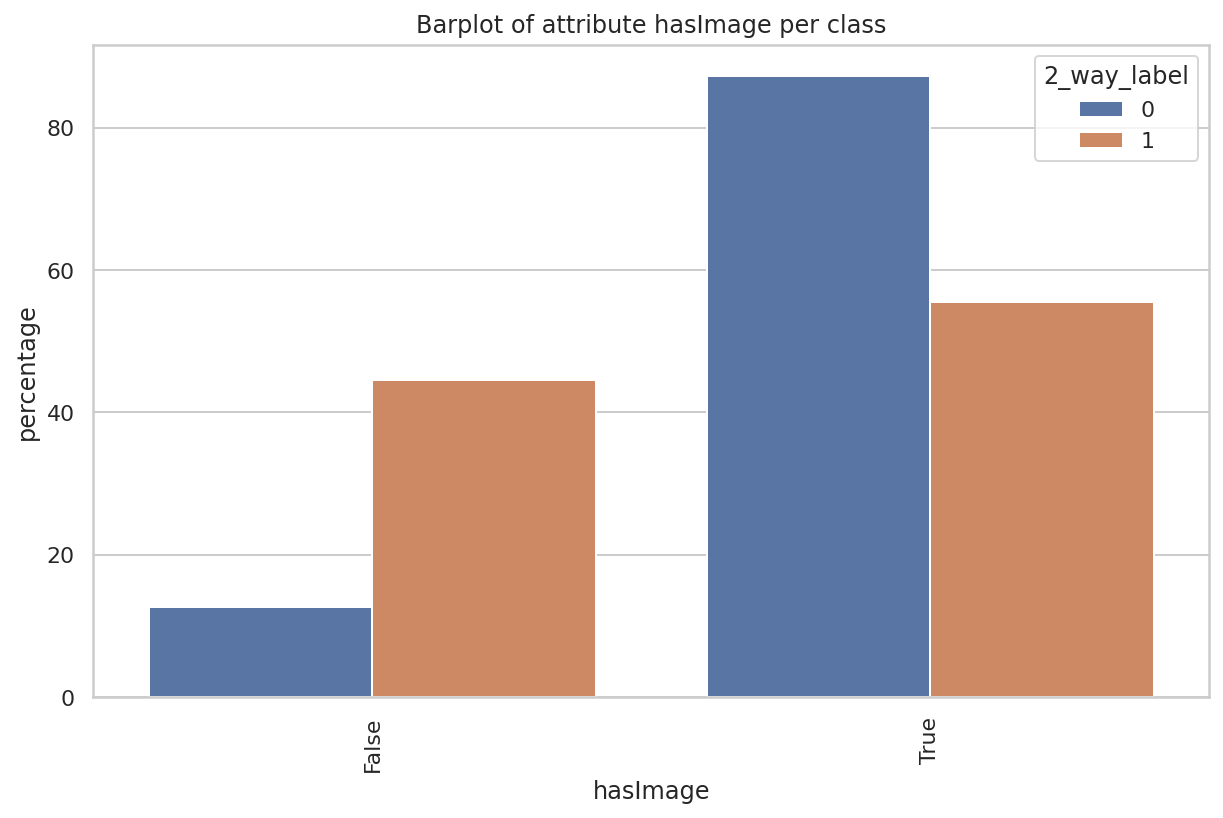



Analysis of attribute "subreddit"


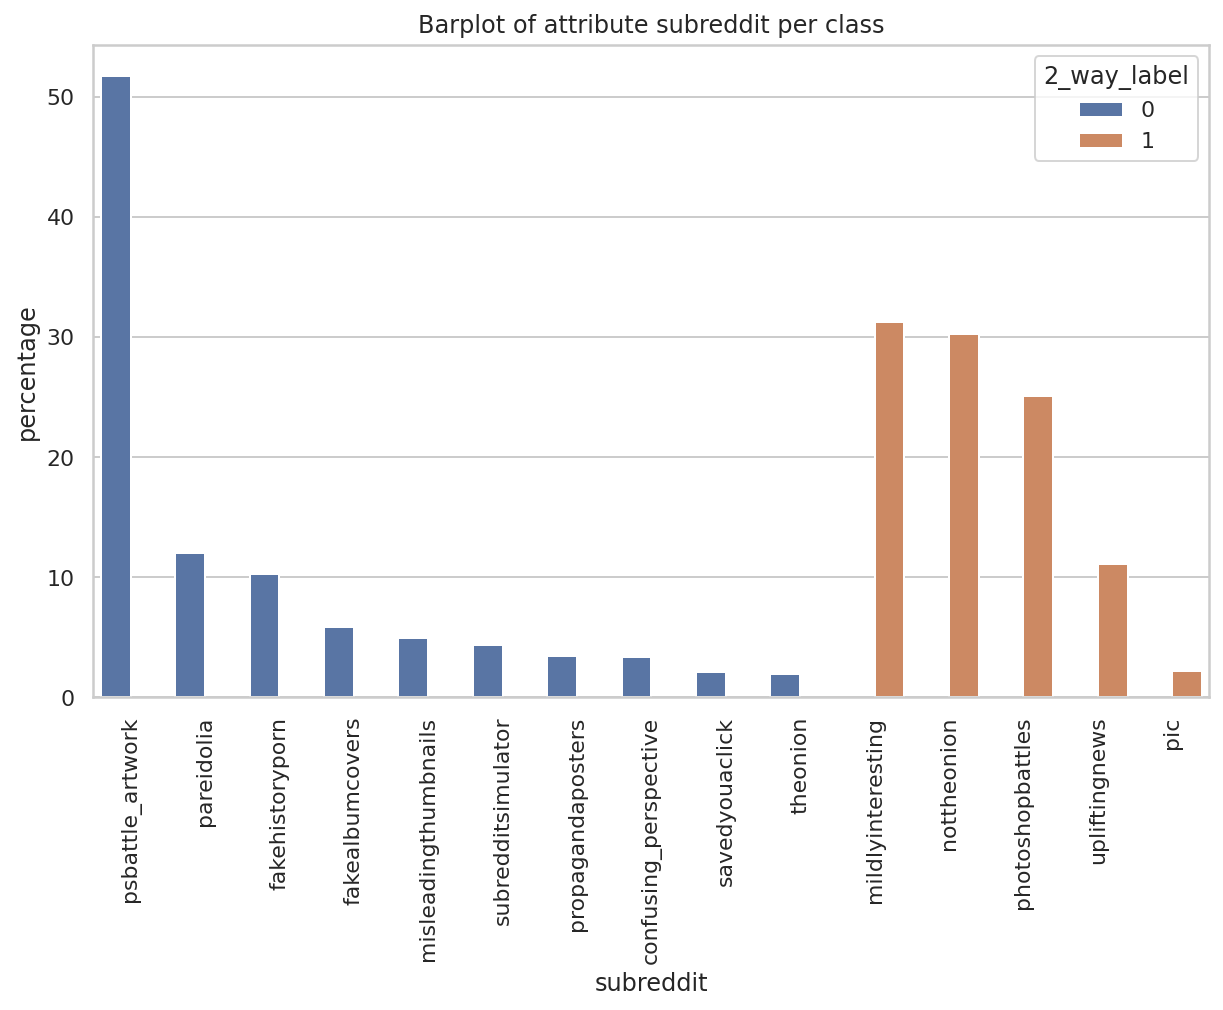

In [17]:
analyse_categorical_attributes(df, label_column, categorical_attributes)

### Textual attributes

Some parts of analysis include preprocessing text. In this case, the following operations are performed:
* removing special characters (only letters are preserved),
* removing tokens shorter than 3 characters,
* removing tokens that are in english stop-words defined by NLTK library,
* removing accent marks from tokens.

Analysis of textual attributes:



Analysis of attribute "clean_title"


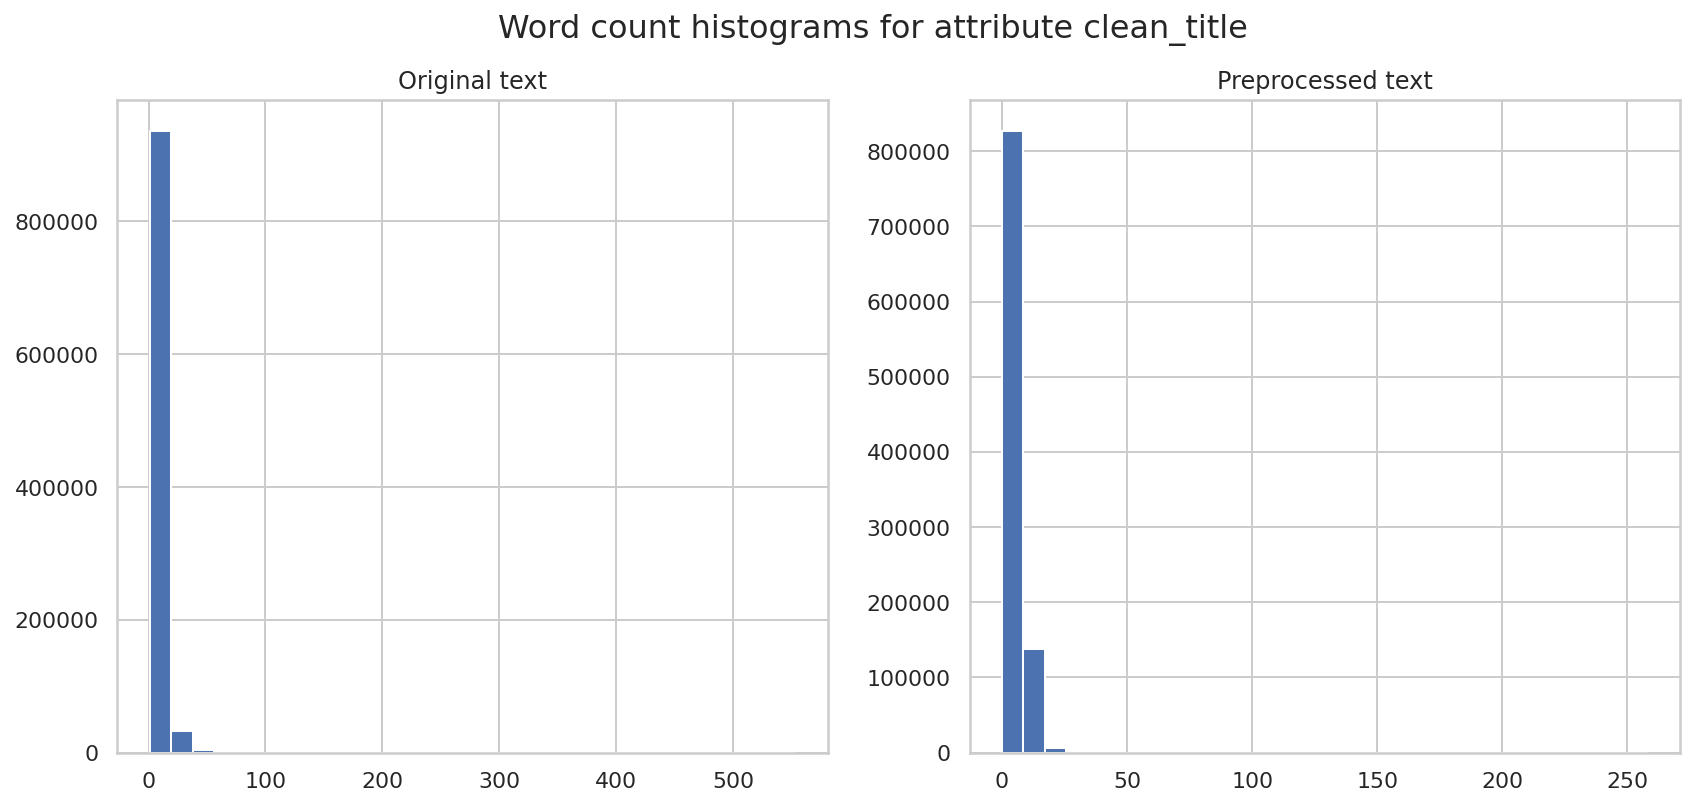

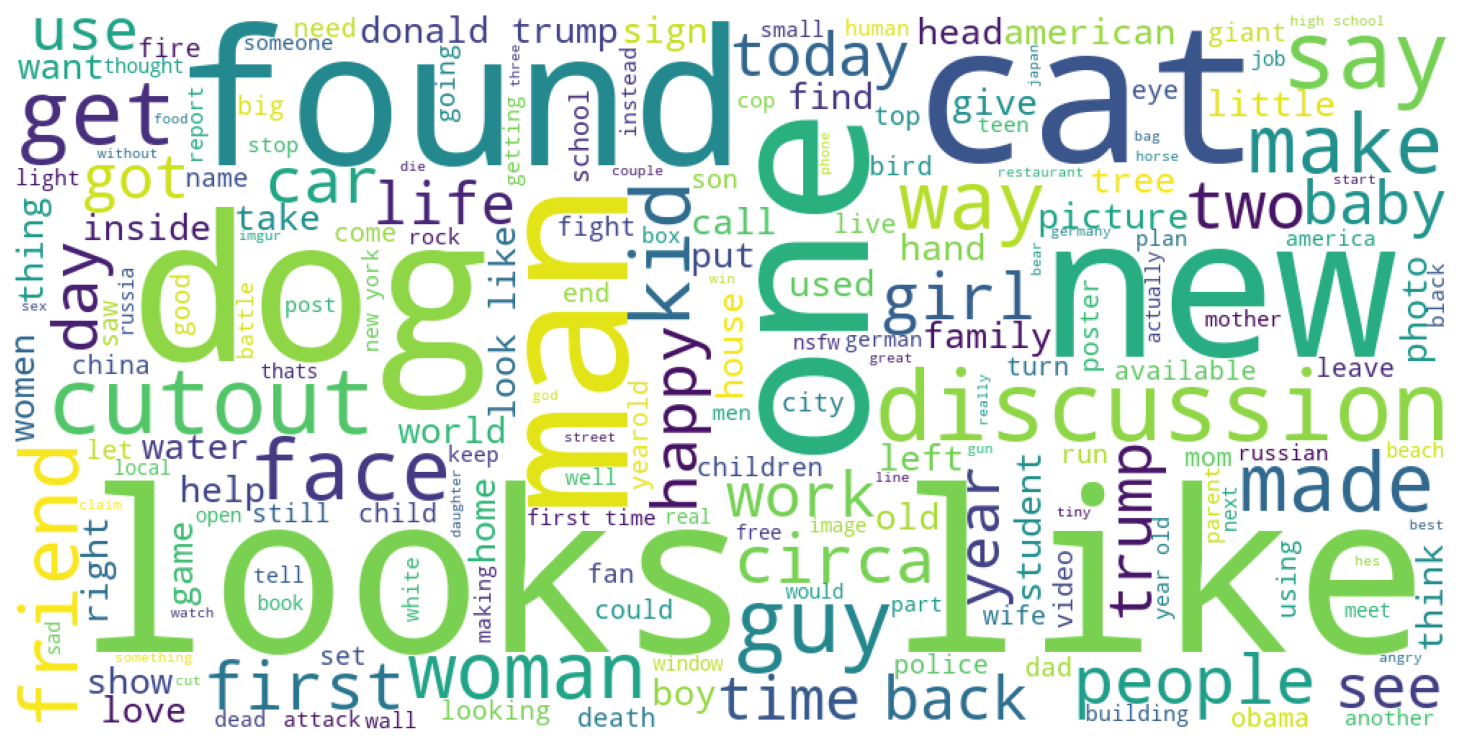



Analysis of attribute "title"


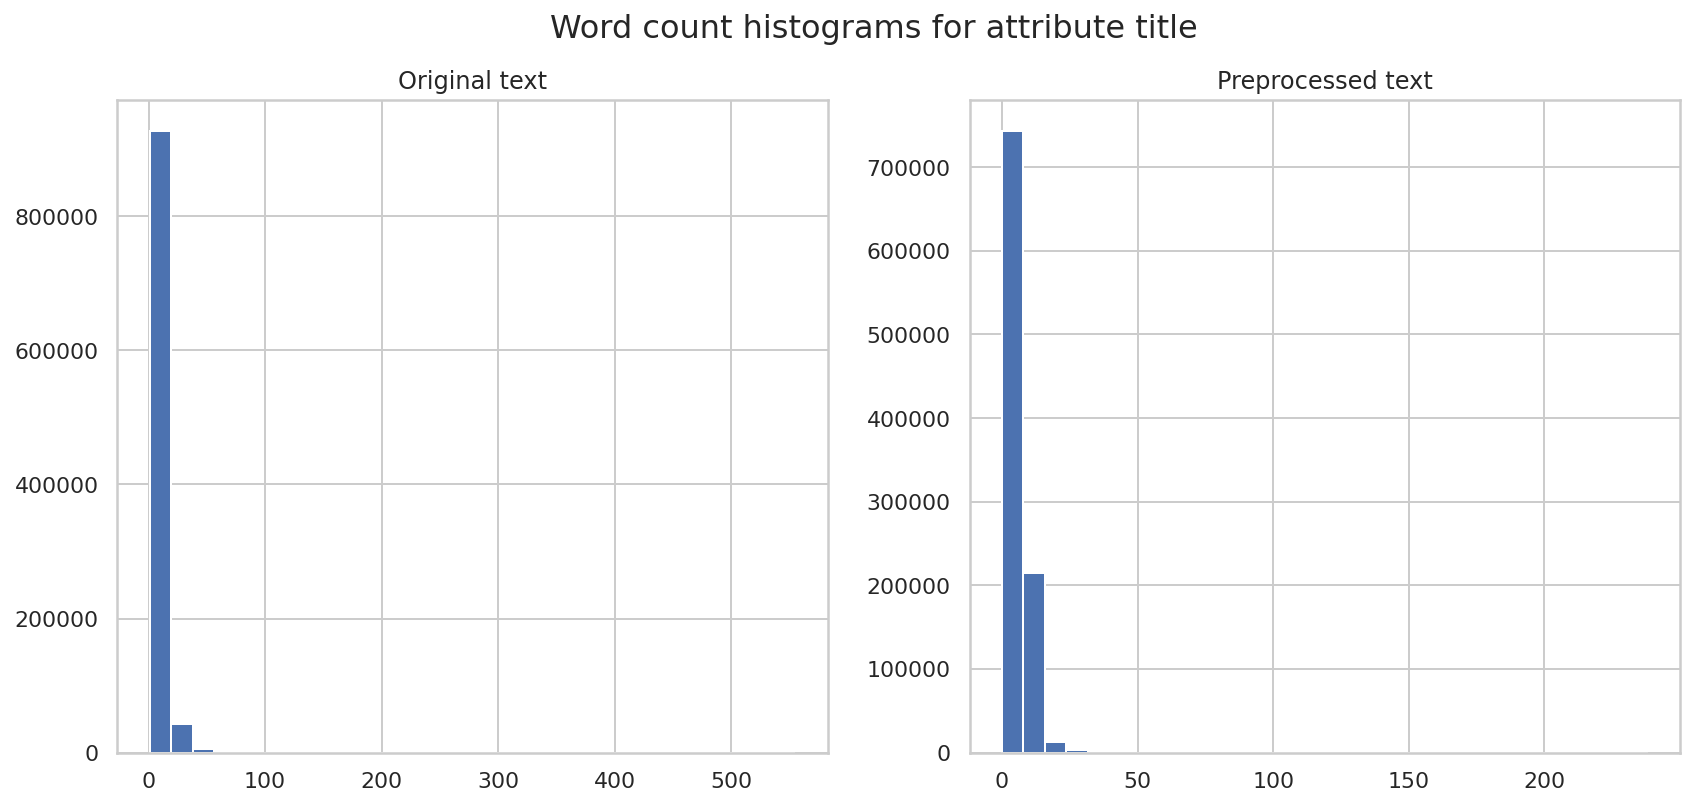

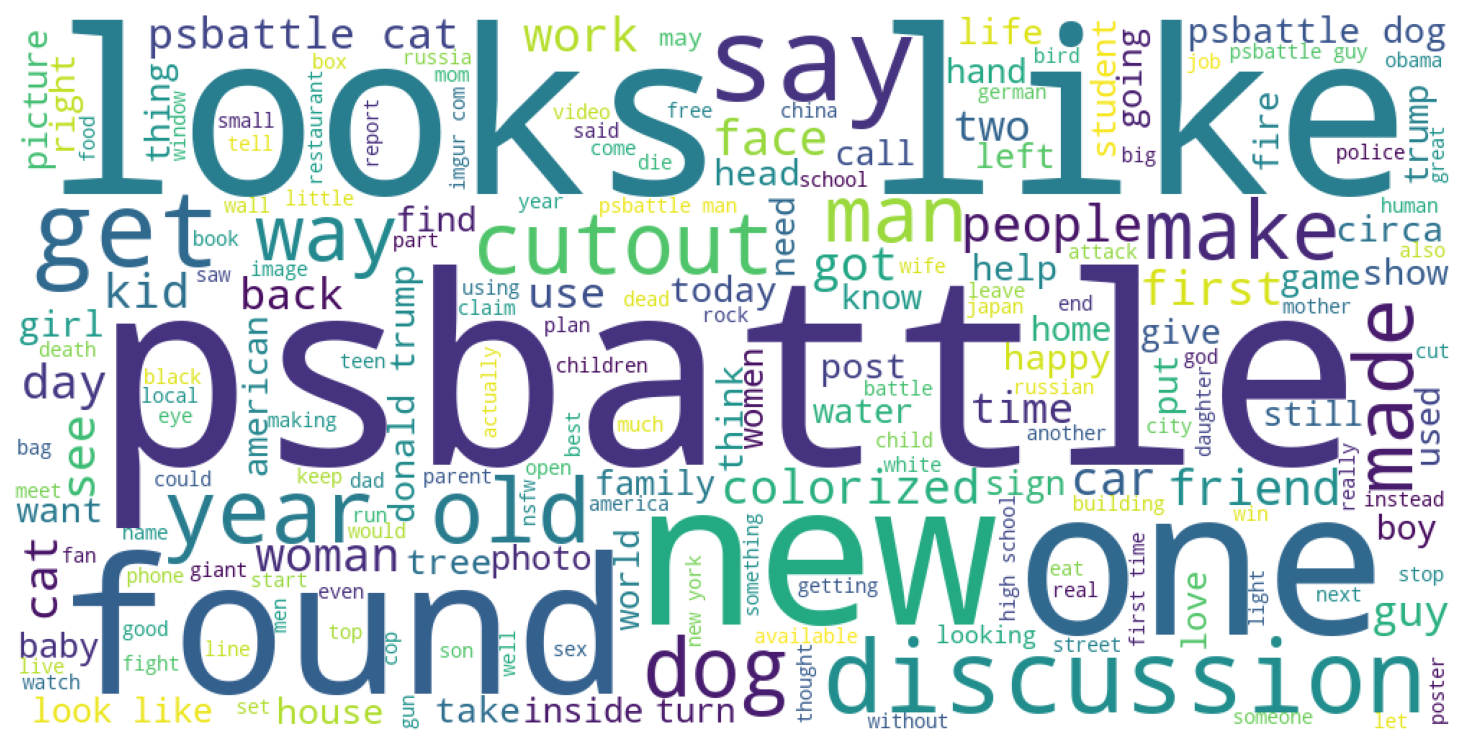

In [18]:
analyse_textual_attributes(df, textual_attributes)

## Pairwise analysis

Pairwise analysis of attributes (numerical attributes):

### Pair analysis

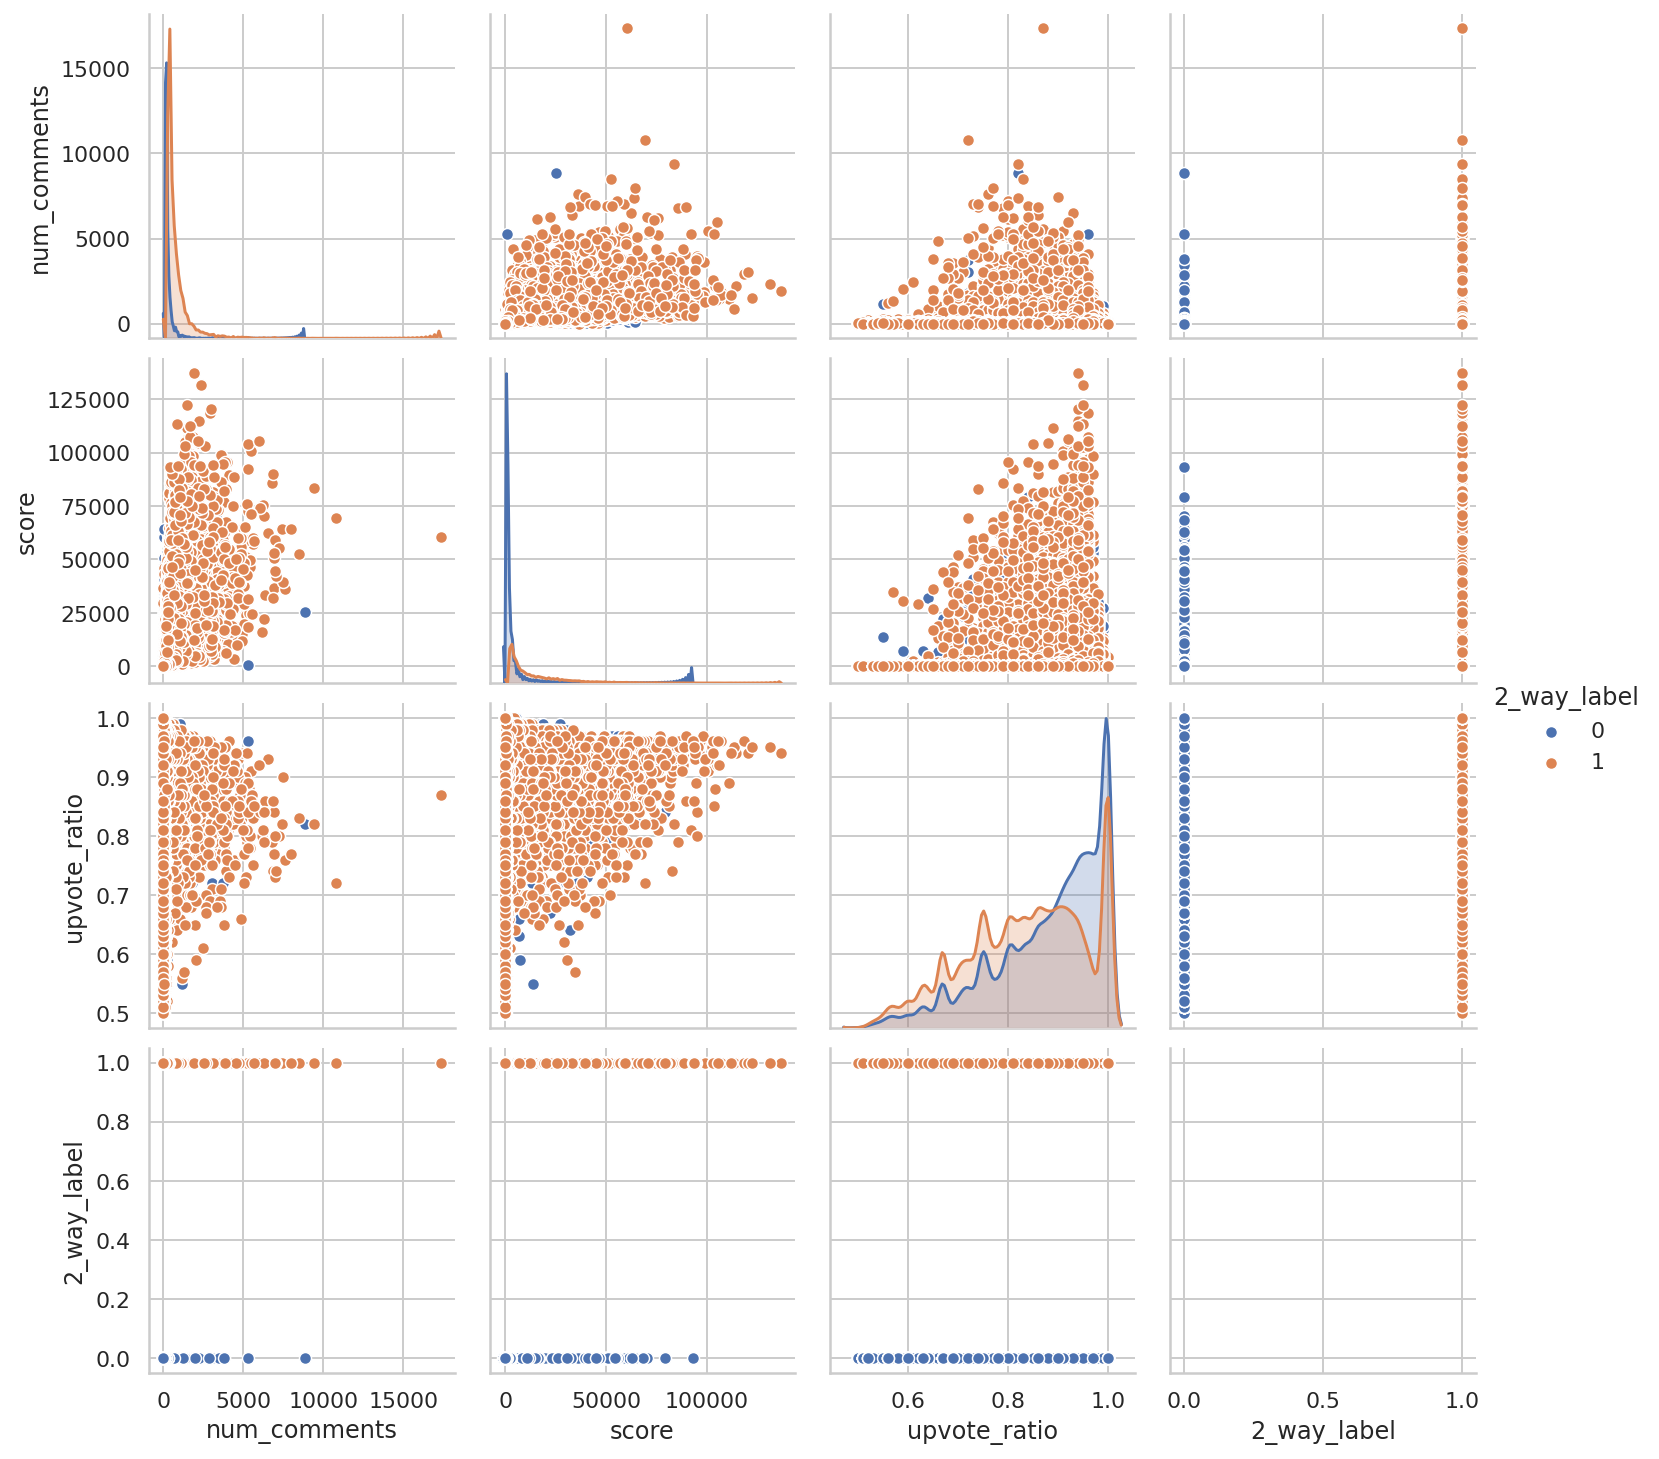

In [19]:
if numerical_attributes and len(numerical_attributes) > 1:
    sns.pairplot(df, vars=numerical_attributes, hue=label_column);

### Correlations

Correlation matrix:

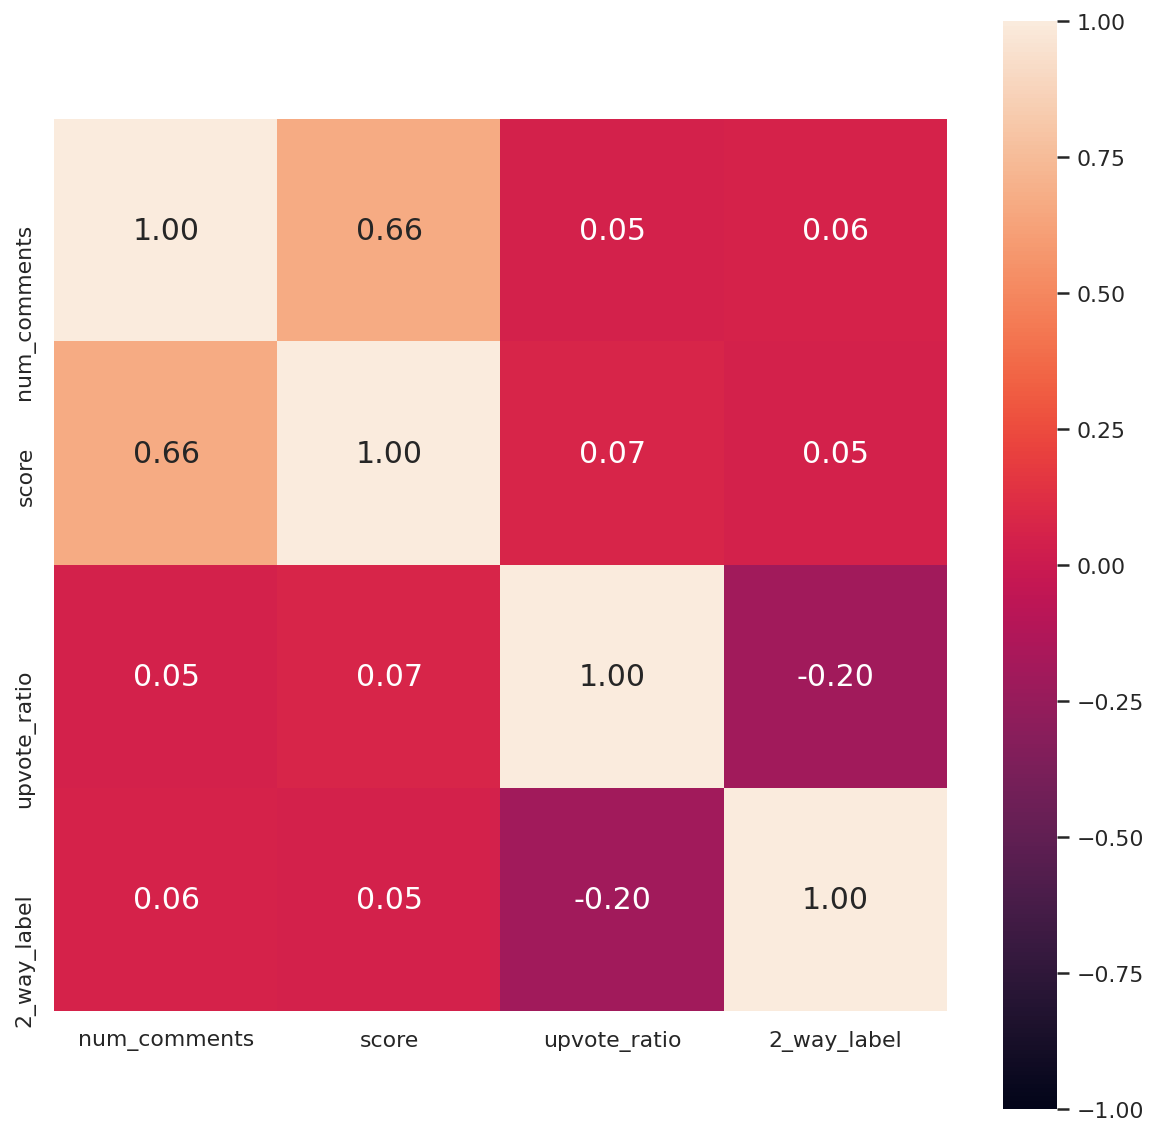

In [20]:
if numerical_attributes and len(numerical_attributes) > 1:
    check_correlations(df, numerical_attributes)